### UÇUŞ GECİKMELERİ VERİLERİNE UYGULANAN NAIVE BAYES SINIFLANDIRICI

In [139]:
library(class)
library(readr)
library(ggplot2)
library(purrr)
library(dplyr)
library(caret)
library(AppliedPredictiveModeling)
library(tidyverse)
library(ISLR)
library(kernlab) 
library(PerformanceAnalytics)
library(naivebayes)
library(e1071)
library(Hmisc)
library(rpart) 
library(pgmm) 
library(rpart.plot) 
library(ipred) 
library(gbm)
library(nnet)
library(elasticnet)
library(broom)
library(shiny)
library(caTools)
library(FREQ)
library(gains)
library(gmodels)
library(wordcloud)
library(outliers)

### Veri Setinin Yüklenmesi

In [140]:
dosya = 'c:/FlightDelays.csv'
delays.df <- read.csv(dosya)

### Verinin Tanıtımı

    CRS_DEP_TIME : 1  : BİLGİSAYAR_KONTROLLU_REZERVASYON_SISTEMI_KALKIŞ ZAMANI 
    CARRIER      : 2  : TAŞIYICI FİRMA 
    DEP_TIME     : 3  : KALKIŞ ZAMANI
    DEST         : 4  : HEDEF_HAVAALANI
    DISTANCE     : 5  : MESAFE
    FL_DATE      : 6  : UÇUŞ_GÜNÜ
    FL_NUM       : 7  : UÇUŞ_NUMARASI
    ORIGIN       : 8  : KALKIŞ_HAVAALANI
    Weather      : 9  : HAVA_DURUMU
    DAY_WEEK     : 10 : HAFTANIN_GUNU
    DAY_OF_MONTH : 11 : AYIN_GUNU
    TAIL_NUM     : 12 : KUYRUK_NUMARASI
    Flight.Status: 13 : UÇUŞ_DURUMU(Rötarlı-Rötarsız)
    
    
    # Day of Week Coded as 1 = Monday, 2 = Tuesday, ..., 7 = Sunday
    Haftanın Günü Kodlaması 1 = Pazartesi, 2 = Salı, ..., 7 = Pazar
    
    # Sch. Dep.(Scheduled Departure) Time Broken down into 18 intervals between 6:00 AM and 10:00 PM
    Planlanan Kalkış Saati 06: 00-22:00 arasında 18 aralığa bölünmüştür
    
    # Origin Three airport codes: DCA (Reagan National), IAD (Dulles),
    Kaynak Üç havaalanı kodu: DCA (Reagan National), IAD (Dulles), BWI (Baltimore–Washington Int’l)
    
    # Destination Three airport codes: JFK (Kennedy), LGA (LaGuardia), EWR (Newark)
    Hedef Üç havaalanı kodu: JFK (Kennedy), LGA (LaGuardia), EWR (Newark)
    
    # Carrier Eight airline codes: -- CO (Continental), DH (Atlantic Coast), DL (Delta),
    Taşıyıcı Sekiz havayolu kodu   -- MQ (American Eagle), OH (Comair), RU (Continental Express),
                                   -- UA (United), and US (USAirways)

In [141]:
colnames(delays.df) # Verinin Etiketlerini veriyor
str(delays.df)      # Verilerin istatiksel bazı önizlemelerini veriyor


[1] "CRS_DEP_TIME"  "CARRIER"       "DEP_TIME"      "DEST"         
 [5] "DISTANCE"      "FL_DATE"       "FL_NUM"        "ORIGIN"       
 [9] "Weather"       "DAY_WEEK"      "DAY_OF_MONTH"  "TAIL_NUM"     
[13] "Flight.Status"

'data.frame':	2201 obs. of  13 variables:
 $ CRS_DEP_TIME : int  1455 1640 1245 1715 1039 840 1240 1645 1715 2120 ...
 $ CARRIER      : Factor w/ 8 levels "CO","DH","DL",..: 5 2 2 2 2 2 2 2 2 2 ...
 $ DEP_TIME     : int  1455 1640 1245 1709 1035 839 1243 1644 1710 2129 ...
 $ DEST         : Factor w/ 3 levels "EWR","JFK","LGA": 2 2 3 3 3 2 2 2 2 2 ...
 $ DISTANCE     : int  184 213 229 229 229 228 228 228 228 228 ...
 $ FL_DATE      : Factor w/ 31 levels "01/01/2004","01/02/2004",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ FL_NUM       : int  5935 6155 7208 7215 7792 7800 7806 7810 7812 7814 ...
 $ ORIGIN       : Factor w/ 3 levels "BWI","DCA","IAD": 1 2 3 3 3 3 3 3 3 3 ...
 $ Weather      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DAY_WEEK     : int  4 4 4 4 4 4 4 4 4 4 ...
 $ DAY_OF_MONTH : int  1 1 1 1 1 1 1 1 1 1 ...
 $ TAIL_NUM     : Factor w/ 549 levels "N10323","N10575",..: 526 263 382 350 385 374 241 227 246 372 ...
 $ Flight.Status: Factor w/ 2 levels "delayed","ontime": 2 2 2 2 2 2 2 2 2 2 ...


### Verinin Kontrolü

In [144]:
colSums(is.na(delays.df)) # Boş olan verilerin kontrolu yapılıyor

CRS_DEP_TIME       CARRIER      DEP_TIME          DEST      DISTANCE 
            0             0             0             0             0 
      FL_DATE        FL_NUM        ORIGIN       WEATHER      DAY_WEEK 
            0             0             0             0             0 
 DAY_OF_MONTH      TAIL_NUM Flight.Status 
            0             0             0

In [10]:
# Değişkenin İsim hatalarını düzeltmek için kullanılır

In [143]:
names(delays.df)[names(delays.df) == "Weather"] <- "WEATHER" 

In [12]:
# Önce sayısal değişkenleri kategorik olarak değiştirilir ve factor formatına dönüştürür.

In [145]:
delays.df$DAY_WEEK <- factor(delays.df$DAY_WEEK)
delays.df$DEP_TIME <- factor(delays.df$DEP_TIME)


In [146]:
delays.df$CRS_DEP_TIME      # kolonundaki satırları listelenir

[1] 1455 1640 1245 1715 1039  840 1240 1645 1715 2120 2120 1455  930 1230
  [15] 1430 1730 2030 1530  600 1830  900 1300 1400 1500 1900  850  900 1100
  [29] 1300 1500 1700 2100 1455 1720 1030  700 1300 1730  840 1710 1245 2120
  [43] 1700 1900 1525 1900 1400 1515 1300 1630 1455 1640 1245 1455 1715  640
  [57] 1039  840 1240 1455 1645 1715 2120 1610 2120 1455  930 1230 1430 1730
  [71] 2030 1530  600 1830  900 1100 1300 1400 1500  850  700  900 1100 1300
  [85] 1500 1700 1900 2100 1720 1030  700 1455 1730 1300  759  840 1245 1430
  [99]  630 1630  700  900  700 1700 1900 1300  900 1900 2100 1400 1515 1525
 [113] 1245 1715  640 1039  840 1240 1455 1645 1715 2120 1610 2120 1455  830
 [127] 1030 1230 1430 1630 1830 2030 1530  600 1830  900 1300  850  700  900
 [141] 1100 1300 1500 1700 1900 1720  700 1030 1455 1300  840 1710 1245 2120
 [155]  630 1725 1400  700  930 1730 1600 1515  700 1455 1640 1245 1455 1715
 [169]  640 1039  840 1240 1455 1645 1715 2120 1610 2120 1455  830 1030 1230
 [183] 1430 1630 1830 2030 1530  600  730 1830 1300 1500 1700 1900  850  900
 [197] 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 1455 1315
 [211] 1605 1030 1300 1630  840 1710 1245 2120 1430 1730  930  900 1900 1400
 [225] 1900 1515 1455 1640 1245 1455 1715  640 1039  840 1240 1645 1715 2120
 [239] 1610 2120 1455  630  730  830  930 1030 1130 1230 1330 1430 1630 1730
 [253] 1830 1930 2030 1530  600  700  800  900 1100 1300 1600 1700 1900  850
 [267]  630  700  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900
 [281] 2000 2100  700 1455 1030 1300  759 1730  840 1710 1245 2120 1430  630
 [295]  700  900 1300 2100  700 1400 1900 1515  900 1525 1455 1245 1455 1715
 [309]  640 1039  840 1240 1455 1645 1715 2120 1610 2120 1455  630  730  830
 [323]  930 1030 1130 1230 1330 1430 1530 1630 1730 1830 1930 2030 1530  600
 [337] 1830  700  800  900 1100 1300 1400 1500 1600 1700 1900  850  630  700
 [351]  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100
 [365] 1455 1720  700 1030 1730 1300 1900  735  840 1710 1245 2120 1430  630
 [379] 2100  900 1900 1500  700 1525 1300 1359 1700 1630  645 1455 1640 1245
 [393] 1455 1715  640 1040  840 1240 1455 1645 1715 2120 1610 1455  630  830
 [407]  930 1030 1130 1230 1330 1430 1530 1630 1730 1830 1930 2030 1530  600
 [421] 1830  700  800  900 1100 1300 1400 1500 1600 1900  850  630  700  800
 [435]  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100  700
 [449] 1455 1720 1030 1300 1900 1730  735  840 1710 1245 2120  630 1430 1359
 [463]  700 1500  900 1300 1700 1900  645 2100 1525 1630 1455 1640 1245 1455
 [477] 1715 2120  640 1040  840 1240 1455 1645 1715 2120 1610 1455  630  730
 [491]  830  930 1030 1130 1230 1330 1430 1530 1630 1730 1830 1930 2030 1530
 [505]  600 1830  700  800  900 1100 1300 1400 1500 1600 1900  850  630  700
 [519]  800  900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100
 [533] 1720 1455 1030  700 1730  735 1300 1900  840 1710 1245 2120  630 1430
 [547] 1500 1900 1300 1630  645 1359  700 1700  900 2100 1525 1455 1640 1245
 [561] 1455 1715 2120  640 1040  840 1240 1455 1645 1715 2120 1610 1455  630
 [575]  730  830  930 1030 1130 1230 1330 1430 1530 1630 1730 1830 1930 2030
 [589] 1530  600 1830  800  900 1100 1300 1400 1500 1600 1700 1900  850  630
 [603]  700  800 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100
 [617] 1720 1455 1030  700 1730 1900 1300  735  840 1710 1245 2120  630 1430
 [631] 1630 1525 1359  700 1300 1900 1500  900 2100 1700  645 1455 1640 1245
 [645] 1715 2120  840 1240 1645 1715 2120 1800 1455  730  830 1030 1230 1430
 [659] 1630 1830 2030 1530  600 1830  900 1300  850  700  900 1100 1300 1500
 [673] 1700 1900 1720 1455  700 1030 1300  840 1710 1245 2120 1700  700 1600
 [687] 1500  645 1730 1359  930 1455 1640 1245 1455 1715 2120  840 1240 1455
 [701] 1645 1715 2120 1610 1455  830 1030 1130 1230 1330 1430 1530 1630 1730
 [715] 1830 1930 2030 1530  600  925 1830 1300 1500 1700 1900  850  900 1000

In [147]:
delays.df$CRS_DEP_TIME <- factor(round(delays.df$CRS_DEP_TIME/100)) 

# BİLGİSAYAR_KONTROLLU_REZERVASYON_SISTEMI_KALKIŞ ZAMANI = CRS_DEP_TIME

In [148]:
delays.df$CRS_DEP_TIME   # Hareket saatlerini saatlik bölmeler olarak oluşturur

[1] 15 16 12 17 10 8  12 16 17 21 21 15 9  12 14 17 20 15 6  18 9  13 14 15
  [25] 19 8  9  11 13 15 17 21 15 17 10 7  13 17 8  17 12 21 17 19 15 19 14 15
  [49] 13 16 15 16 12 15 17 6  10 8  12 15 16 17 21 16 21 15 9  12 14 17 20 15
  [73] 6  18 9  11 13 14 15 8  7  9  11 13 15 17 19 21 17 10 7  15 17 13 8  8 
  [97] 12 14 6  16 7  9  7  17 19 13 9  19 21 14 15 15 12 17 6  10 8  12 15 16
 [121] 17 21 16 21 15 8  10 12 14 16 18 20 15 6  18 9  13 8  7  9  11 13 15 17
 [145] 19 17 7  10 15 13 8  17 12 21 6  17 14 7  9  17 16 15 7  15 16 12 15 17
 [169] 6  10 8  12 15 16 17 21 16 21 15 8  10 12 14 16 18 20 15 6  7  18 13 15
 [193] 17 19 8  9  10 11 12 13 14 15 16 17 18 19 20 21 15 13 16 10 13 16 8  17
 [217] 12 21 14 17 9  9  19 14 19 15 15 16 12 15 17 6  10 8  12 16 17 21 16 21
 [241] 15 6  7  8  9  10 11 12 13 14 16 17 18 19 20 15 6  7  8  9  11 13 16 17
 [265] 19 8  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 7  15 10 13 8  17
 [289] 8  17 12 21 14 6  7  9  13 21 7  14 19 15 9  15 15 12 15 17 6  10 8  12
 [313] 15 16 17 21 16 21 15 6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 15 6 
 [337] 18 7  8  9  11 13 14 15 16 17 19 8  6  7  8  9  10 11 12 13 14 15 16 17
 [361] 18 19 20 21 15 17 7  10 17 13 19 7  8  17 12 21 14 6  21 9  19 15 7  15
 [385] 13 14 17 16 6  15 16 12 15 17 6  10 8  12 15 16 17 21 16 15 6  8  9  10
 [409] 11 12 13 14 15 16 17 18 19 20 15 6  18 7  8  9  11 13 14 15 16 19 8  6 
 [433] 7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 7  15 17 10 13 19 17 7  8 
 [457] 17 12 21 6  14 14 7  15 9  13 17 19 6  21 15 16 15 16 12 15 17 21 6  10
 [481] 8  12 15 16 17 21 16 15 6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 15
 [505] 6  18 7  8  9  11 13 14 15 16 19 8  6  7  8  9  10 11 12 13 14 15 16 17
 [529] 18 19 20 21 17 15 10 7  17 7  13 19 8  17 12 21 6  14 15 19 13 16 6  14
 [553] 7  17 9  21 15 15 16 12 15 17 21 6  10 8  12 15 16 17 21 16 15 6  7  8 
 [577] 9  10 11 12 13 14 15 16 17 18 19 20 15 6  18 8  9  11 13 14 15 16 17 19
 [601] 8  6  7  8  10 11 12 13 14 15 16 17 18 19 20 21 17 15 10 7  17 19 13 7 
 [625] 8  17 12 21 6  14 16 15 14 7  13 19 15 9  21 17 6  15 16 12 17 21 8  12
 [649] 16 17 21 18 15 7  8  10 12 14 16 18 20 15 6  18 9  13 8  7  9  11 13 15
 [673] 17 19 17 15 7  10 13 8  17 12 21 17 7  16 15 6  17 14 9  15 16 12 15 17
 [697] 21 8  12 15 16 17 21 16 15 8  10 11 12 13 14 15 16 17 18 19 20 15 6  9 
 [721] 18 13 15 17 19 8  9  10 11 12 13 14 15 16 17 18 19 20 21 17 10 13 15 19
 [745] 13 16 8  17 12 21 14 21 8  17 17 14 9  15 19 15 16 12 15 17 21 6  10 8 
 [769] 12 15 16 17 21 15 6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 15 6  18
 [793] 7  8  9  11 13 15 16 17 19 8  6  7  8  9  10 11 12 13 14 15 16 17 18 19
 [817] 20 21 7  15 17 10 7  13 17 19 8  17 12 21 6  14 14 9  15 17 19 21 13 6 
 [841] 16 7  15 15 16 12 17 21 6  10 8  12 15 16 17 21 16 15 6  7  8  9  10 11
 [865] 12 13 14 15 16 17 18 19 20 15 6  18 7  8  9  11 13 14 15 16 17 19 8  6 
 [889] 7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 10 17 7  15 7  17 19 13 8 
 [913] 17 12 21 6  14 13 7  15 17 14 19 15 6  16 9  21 15 16 12 17 21 6  10 8 
 [937] 12 15 16 17 21 16 15 6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 15 6 
 [961] 18 7  8  9  11 13 15 16 17 19 8  6  7  8  9  10 11 12 13 14 15 16 17 18
 [985] 19 20 21 7  15 17 10 13 19 7  17 8  17 12 21 6  14 7  17 9  14 6  15 16
[1009] 19 13 15 21 15 16 12 15 21 8  12 15 16 17 21 16 15 6  7  9  11 13 14 15
[1033] 16 17 18 19 20 15 6  18 8  11 13 14 15 16 17 19 8  6  8  9  11 12 14 15
[1057] 16 17 18 19 21 15 10 17 7  19 13 8  12 21 6  6  19 7  13 16 15 15 21 9 
[1081] 14 15 16 15 17 21 6  8  12 15 16 17 21 16 15 6  7  8  9  10 11 12 13 14
[1105] 15 16 17 18 19 20 15 6  18 8  9  11 13 14 16 17 19 8  6  7  8  9  10 11
[1129] 12 13 14 15 16 17 18 19 20 21 17 10 15 7  13 17 7  8  17 12 21 6  15 6 
[1153] 15 14 16 13 9  19 7  21 17 15 16 12 17 21 8  12 16 17 21 18 15 7  8  10
[1177] 14 16 18 20 15 6  18 9  13 8  7  9  11 13 15 17 19 17 15 10 7  13 8  17
[1201] 12 21 7  16 17 14 15 9  17 6  15 16 12 15 17 2

In [17]:
# print(delays.df)

### Eğitim ve doğrulama setlerin oluşturulması.

In [149]:
# library(caret)

kolon_num <- c(10, 1, 8, 4, 2, 13) # Kolon numaralarını içeren vektör

train.index <- sample(c(1:dim(delays.df)[1]), dim(delays.df)[1]*0.7) # delay.df nin 2201 satırından belirli büyüklükte data alır

train.df <- delays.df[train.index, kolon_num] # Eğitim için kullanılır

valid.df <- delays.df[-train.index, kolon_num] # Test için kullanılır


In [153]:
CrossTable(delays.df$DAY_WEEK, delays.df$Flight.Status) # günlerdeki rötarlı ve rötarsız kalkış sayılarının 
                                                        # toplam kalkış sayısına oranı
# CrossTable(delays.df$ORIGIN, delays.df$DEST) # 


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2201 

 
                   | delays.df$Flight.Status 
delays.df$DAY_WEEK |   delayed |    ontime | Row Total | 
-------------------|-----------|-----------|-----------|
                 1 |        84 |       224 |       308 | 
                   |     9.703 |     2.342 |           | 
                   |     0.273 |     0.727 |     0.140 | 
                   |     0.196 |     0.126 |           | 
                   |     0.038 |     0.102 |           | 
-------------------|-----------|-----------|-----------|
                 2 |        63 |       244 |       307 | 
                   |     0.183 |     0.044 |           | 
                   |     0.205 |     0.795 |     0.139 | 
                   |     0.147 |     0.138 |           | 
  

In [21]:
# CrossTable(delays.df$ORIGIN, delays.df$CARRIER)
# CrossTable(delays.df$DEST, delays.df$CARRIER) 
# CrossTable(delays.df$CARRIER, delays.df$DEP_TIME) 
# CrossTable(delays.df$CRS_DEP_TIME, delays.df$DEP_TIME) 

In [22]:
# Laplace = Test Kümesindeki bir değerin eğitim kümesinde gözlemlenemeyen  
# bir değeri varsa olasılık değeri olarak 0 verir yani tahmin yapmaz. 
# bunu engellemek için LAPLACE uygulanabilir.
# kısaca açıklarsak : çalışan veri setindeki örnek sayısı çok fazla 
# olduğunda her bir tahmin edici sınıfa +1 gibi sonuca önemli etki 
# yapmayacak küçük bir ekleme yapılarak SIFIR OLASILIK DURUMU önlenebilir.

In [154]:
# Naive Bayes'i Çalıştırır.

# Eğitim setindeki gecikmiş uçuşların ve zamanında uçuşlarının oranlarını (önceden olasılıklar olarak adlandırılır), 
# ardından her bir sınıf için koşullu olasılıkların tahmin değerlerinin bir fonksiyonu olarak gösterir.

# Library (e1071)

delays.nb <- naiveBayes(Flight.Status ~ ., data = train.df , Laplace = 1 )
delays.nb


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, Laplace = 1)

A-priori probabilities:
Y
  delayed    ontime 
0.1935065 0.8064935 

Conditional probabilities:
         DAY_WEEK
Y                  1          2          3          4          5          6
  delayed 0.20134228 0.15100671 0.13422819 0.13422819 0.18456376 0.05369128
  ontime  0.13043478 0.13848631 0.14814815 0.17471820 0.18035427 0.12962963
         DAY_WEEK
Y                  7
  delayed 0.14093960
  ontime  0.09822866

         CRS_DEP_TIME
Y                  6          7          8          9         10         11
  delayed 0.03020134 0.03691275 0.05033557 0.02684564 0.03020134 0.01342282
  ontime  0.06119163 0.05716586 0.07568438 0.05797101 0.05072464 0.03542673
         CRS_DEP_TIME
Y                 12         13         14         15         16         17
  delayed 0.05033557 0.04362416 0.05033557 0.21476510 0.08724832 0.13758389
  ontime  0.06602254 0.07407407

In [155]:
prop.table(table(train.df$Flight.Status, train.df$DEST), margin = 1)

# sayım tablosunu oran tablosuna dönüştürmek için margin = 1 ile prop.table () kullanın,
# burada her satırın toplamı 1'dir (sütun toplamları için margin = 2 kullanın).

         
                EWR       JFK       LGA
  delayed 0.3523490 0.1879195 0.4597315
  ontime  0.2753623 0.1803543 0.5442834

In [159]:
pred.prob <- predict(delays.nb, newdata = valid.df, type = "raw") # Olasılıkların tahmin edilmesi

# sayı / sınıf tahminleri veya sınıf olasılıkları için sırasıyla "raw" veya "prob" kullanılır.
# sayılar veya sınıflar açısından tahminler oluşturmak bunuda temel modelle eşlemek için, kendi mantığını kullanır.

In [160]:
pred.prob

delayed,ontime
0.30638413,0.6936159
0.03207574,0.9679243
0.05173505,0.9482649
0.09611216,0.9038878
0.08119467,0.9188053
0.31094008,0.6890599
0.08378937,0.9162106
0.13974630,0.8602537
0.01935130,0.9806487
0.08798504,0.9120150


In [161]:
pred.class <- predict(delays.nb, newdata = valid.df)  # Sınıf üyeliğinin tahmin edilmesi

In [162]:
pred.class

[1] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [10] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [19] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [28] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [37] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [46] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [55] ontime  ontime  ontime  delayed delayed ontime  ontime  ontime  ontime 
 [64] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [73] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
 [82] ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime 
 [91] ontime  ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime 
[100] delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[109] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[118] ontime  ontime  ontime  delayed ontime  ontime  ontime  ontime  ontime 
[127] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[136] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[145] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[154] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[163] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[172] delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[181] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[190] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[199] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[208] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed
[217] ontime  ontime  ontime  delayed delayed delayed ontime  ontime  ontime 
[226] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[235] ontime  ontime  ontime  ontime  ontime  delayed ontime  delayed ontime 
[244] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[253] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[262] ontime  delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[271] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[280] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[289] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[298] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[307] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[316] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[325] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[334] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[343] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[352] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[361] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[370] ontime  ontime  ontime  delayed delayed delayed ontime  ontime  ontime 
[379] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[388] ontime  ontime  ontime  ontime  ontime  ontime  ontime  delayed ontime 
[397] delayed delayed ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[406] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[415] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[424] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[433] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[442] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[451] ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime  ontime 
[460] ontime  ontime  on

In [164]:
valid.df

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,CARRIER,Flight.Status
10,4,21,IAD,JFK,DH,ontime
13,4,9,DCA,LGA,DL,ontime
14,4,12,DCA,LGA,DL,ontime
16,4,17,DCA,LGA,DL,ontime
17,4,20,DCA,LGA,DL,ontime
18,4,15,DCA,JFK,MQ,ontime
21,4,9,DCA,LGA,MQ,ontime
23,4,14,DCA,LGA,MQ,ontime
28,4,11,DCA,LGA,US,ontime
30,4,15,DCA,LGA,US,ontime


In [165]:
df <- data.frame(actual = valid.df$Flight.Status, predicted = pred.class, pred.prob)

In [173]:
df

df == "DL" & valid.df$DAY_WEEK == 5 & valid.df$CRS_DEP_TIME == 9 & 
valid.df$DEST == "LGA" & valid.df$ORIGIN == "DCA",

# Oluşturulan verilere dayanarak Haftanın 5. günü kaynak noktası DCA
# Taşıyıcı firma olarak DL Kalkış saati 9 ve hedef noktası LGA olan verilerin analizi yapılır

actual,predicted,delayed,ontime
ontime,ontime,0.30638413,0.6936159
ontime,ontime,0.03207574,0.9679243
ontime,ontime,0.05173505,0.9482649
ontime,ontime,0.09611216,0.9038878
ontime,ontime,0.08119467,0.9188053
ontime,ontime,0.31094008,0.6890599
ontime,ontime,0.08378937,0.9162106
ontime,ontime,0.13974630,0.8602537
ontime,ontime,0.01935130,0.9806487
ontime,ontime,0.08798504,0.9120150


In [174]:
# Modelin Kararlılığı test edilir

# training - Eğitim 1540 verisi

pred.class <- predict(delays.nb, newdata = train.df)
confusionMatrix(pred.class, train.df$Flight.Status)

# validation - Doğrulama 661 verisi
pred.class <- predict(delays.nb, newdata = valid.df)
confusionMatrix(pred.class, valid.df$Flight.Status)

Confusion Matrix and Statistics

          Reference
Prediction delayed ontime
   delayed      31     37
   ontime      267   1205
                                          
               Accuracy : 0.8026          
                 95% CI : (0.7818, 0.8222)
    No Information Rate : 0.8065          
    P-Value [Acc > NIR] : 0.6645          
                                          
                  Kappa : 0.105           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.10403         
            Specificity : 0.97021         
         Pos Pred Value : 0.45588         
         Neg Pred Value : 0.81861         
             Prevalence : 0.19351         
         Detection Rate : 0.02013         
   Detection Prevalence : 0.04416         
      Balanced Accuracy : 0.53712         
                                          
       'Positive' Class : delayed         
         

Confusion Matrix and Statistics

          Reference
Prediction delayed ontime
   delayed      11     18
   ontime      119    513
                                         
               Accuracy : 0.7927         
                 95% CI : (0.7598, 0.823)
    No Information Rate : 0.8033         
    P-Value [Acc > NIR] : 0.7699         
                                         
                  Kappa : 0.0718         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.08462        
            Specificity : 0.96610        
         Pos Pred Value : 0.37931        
         Neg Pred Value : 0.81171        
             Prevalence : 0.19667        
         Detection Rate : 0.01664        
   Detection Prevalence : 0.04387        
      Balanced Accuracy : 0.52536        
                                         
       'Positive' Class : delayed        
                             

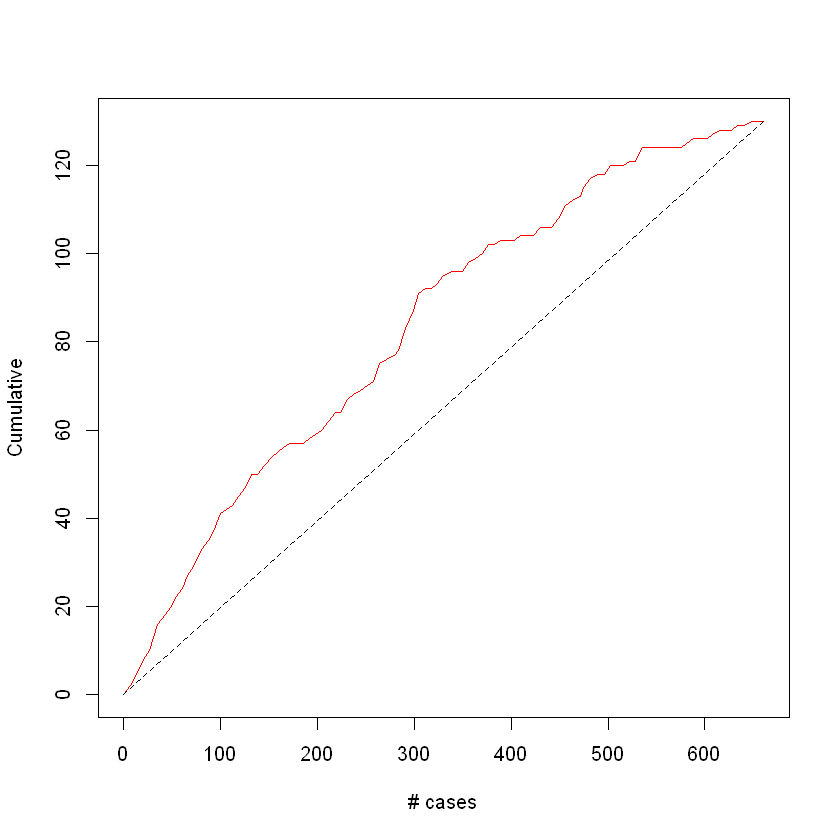

In [175]:
# library(gains)
gain <- gains(ifelse(valid.df$Flight.Status=="delayed",1,0), pred.prob[,1], groups=100)
plot(c(0,gain$cume.pct.of.total*sum(valid.df$Flight.Status=="delayed"))~c(0,gain$cume.obs),
xlab="# cases", ylab="Cumulative", main="", type="l", col="red")
lines(c(0,sum(valid.df$Flight.Status=="delayed"))~c(0, dim(valid.df)[1]), lty=2)